# Vaex

- [Website](https://vaex.io/)
- [Github repo](https://github.com/vaexio/vaex)

Vaex is a lazy out-of-core dataframe API that is meant for visualizing and exploring large datasets. Vaex uses memory mapping, zero memory copy policy and lazy computations for best performance

```
pip install vaex
```

In [1]:
import vaex

The nice thing about Vaex is that it has an example dataframe that you can play with to get your feet wet. You can access this toy dataframe as shown below:

In [2]:
df = vaex.example()
df.shape

(330000, 11)

### Loading Data 

If you already have a dataset that you want to work with, you can load it in as a Vaex dataframe using: 
- `from_csv` for comma separate value files 
- `from_pandas` for existing Pandas DataFrames

Let's load in an online retail sales dataset, which I found on [Kaggle](https://www.kaggle.com/datasets/thedevastator/online-retail-sales-and-customer-data?resource=download).

In [3]:
df = vaex.from_csv("data/online_retail.csv")
df.shape

(541909, 9)

This dataframe has similar methods and attributes as a Pandas dataframe but the datatype is different:

In [4]:
type(df)

vaex.dataframe.DataFrameLocal

### Columns != Numpy Arrays

You can fetch an individual column using the same approach as you would with Pandas. The only difference is that Pandas would return a Numpy array but Vaex returns an "expression". 

In [5]:
df['Description']

Expression = Description
Length: 541,909 dtype: string (column)
--------------------------------------
     0   WHITE HANGING HEART T-LIGHT HOLDER
     1                  WHITE METAL LANTERN
     2       CREAM CUPID HEARTS COAT HANGER
     3  KNITTED UNION FLAG HOT WATER BOTTLE
     4       RED WOOLLY HOTTIE WHITE HEART.
                    ...                    
541904          PACK OF 20 SPACEBOY NAPKINS
541905          CHILDREN'S APRON DOLLY GIRL
541906         CHILDRENS CUTLERY DOLLY GIRL
541907      CHILDRENS CUTLERY CIRCUS PARADE
541908         BAKING SET 9 PIECE RETROSPOT

### Virtual Columns

When creating a new column on a Vaex dataframe, this actually gets represented as a "virtual" column. Virtual columns are computed when needed and don't take up any memory. Lazy computation for the win!

In [6]:
df['total_price'] = df['Quantity']*df['UnitPrice']

### Plotting 

There are some nice, easy-to-use plotting functions that come with Vaex. Vaex wraps Matplotlib, hence the Matplotlib-like plots:

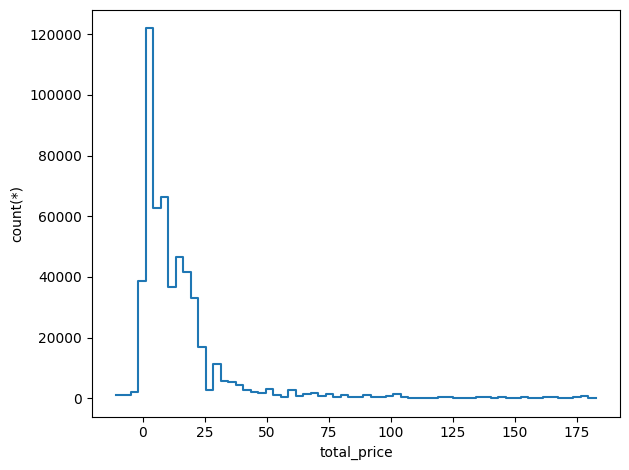

In [7]:
df.viz.histogram(df.total_price, limits='98%')

The `limits` parameter lets you decide what percentage of data to build the histogram with. 

The 2D scatterplot has a 5K row limit so in this case, we're going to need to work with a smaller subset of the original dataframe:

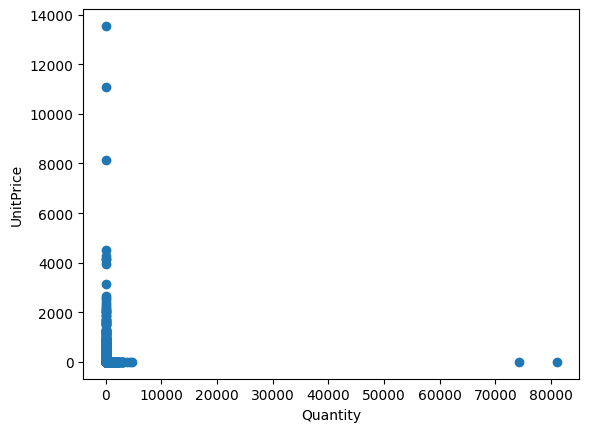

In [8]:
df.viz.scatter(
    df['Quantity'], df['UnitPrice'], 
    selection=df['total_price']>50)

### Grouping By

To do a group-by aggregation, you can use Vaex's `groupby` method:

In [10]:
df.groupby(by='Country').agg({'UnitPrice': 'mean'}).head(5)

#,Country,UnitPrice
0,Sweden,3.91089
1,Italy,4.83112
2,Finland,5.44871
3,Czech Republic,2.93833
4,Spain,4.98754


The cool thing about groupby, is that you can specify your selections directly in the groupby call:

In [20]:
df.groupby(
    by='Country',
    agg={
        'mean_unit_price_greater_than_50_quantity': vaex.agg.mean('UnitPrice', selection='Quantity>50'),
        'mean_unit_price_greater_than_100_quantity': vaex.agg.mean('UnitPrice', selection='Quantity>100'),
        'mean_unit_price_greater_than_1k_quantity': vaex.agg.mean('UnitPrice', selection='Quantity>1000'),
    }).head(5)

#,Country,mean_unit_price_greater_than_50_quantity,mean_unit_price_greater_than_100_quantity,mean_unit_price_greater_than_1k_quantity
0,Sweden,1.16303,0.887615,nan
1,Italy,0.584,0.555,nan
2,Finland,1.62562,0.424545,nan
3,Czech Republic,0.29,nan,nan
4,Spain,1.89846,2.18474,nan
